# Reducing Dimensionality of our Dataset
#### Jameson Carter
#### 11/23/2021
The geographic dataset obtained in getACS.py has almost 100 variables, and the additional datasets we add on have many more. This code uses PCA analysis to reduce the dimensionality of our dataset and reduce collinearity, using scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [38]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score

In [39]:
# Replace following dataset with the correct filepath
data = pd.read_csv('C:/Users/jacar/OneDrive/Documents/chicago-complaints/data/Combined.csv')
data = data.drop(['geo_id', 'geometry', 'GEOID10'], axis = 1)

y = data['complaint_count']
X = data.drop('complaint_count', axis = 1)
# subs = data.iloc[:,1:-2]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1) # divide into training and testing

In [40]:
data

,B01001_001E,DP02_0002PE,DP02_0004PE,DP02_0006PE,DP02_0010PE,DP02_0014PE,DP02_0015PE,DP02_0016E,DP02_0017E,DP02_0022PE,...,DP05_0044PE,DP05_0058PE,DP05_0071PE,complaint_count,police_stations,fire_stations,public_schools,parks,commercial_establishments,number_of_police_killings
0,4599.0,23.8,2.5,39.5,34.2,21.5,8.7,1.89,3.05,25.4,...,1.0,3.4,11.4,0.0,0.0,0.0,1.0,3.0,24.0,0.0
1,7455.0,33.7,7.2,28.3,30.8,28.2,14.9,2.65,3.50,34.5,...,4.0,8.0,22.4,0.0,0.0,0.0,1.0,1.0,30.0,0.0
2,2896.0,23.1,13.6,23.0,40.4,26.9,17.9,2.27,3.31,25.1,...,5.4,1.4,26.0,1.0,0.0,1.0,1.0,2.0,58.0,0.0
3,6485.0,25.3,7.4,25.2,42.1,17.0,18.7,1.80,2.79,20.0,...,1.0,4.2,16.9,0.0,0.0,0.0,0.0,1.0,71.0,0.0
4,5213.0,17.4,5.7,36.4,40.5,12.5,10.7,1.82,2.93,16.8,...,4.6,1.8,7.5,0.0,0.0,0.0,0.0,3.0,41.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,10169.0,33.0,22.8,25.6,18.6,50.9,10.2,3.58,4.03,44.1,...,0.3,0.0,26.3,1.0,0.0,0.0,1.0,0.0,121.0,0.0
794,2898.0,12.5,8.8,18.9,59.7,28.4,20.9,2.06,2.90,32.5,...,0.9,2.4,7.9,1.0,0.0,1.0,0.0,1.0,42.0,0.0
795,2527.0,51.3,5.6,17.9,25.1,39.6,22.4,2.55,3.50,32.6,...,6.7,6.4,25.7,3.0,0.0,1.0,1.0,2.0,117.0,1.0
796,1520.0,19.8,9.5,31.9,38.8,32.4,32.5,2.23,3.04,31.1,...,7.3,0.5,7.0,1.0,0.0,1.0,2.0,1.0,31.0,0.0


In [8]:
scaler = StandardScaler()
scaler.fit(subs)
scaledSubs=scaler.transform(subs)

92

In [9]:
'''
From https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
The below parameter is set to 0.95 so that we find the minimum number of principal components such that 95% 
of the variance is retained.

Additionally, we should only run this over the training set
'''
pca = PCA(n_components = len(scaledSubs[0]))

pca.fit(scaledSubs)

PCA(n_components=92)

In [10]:
print(pca.explained_variance_ratio_) # The model kept 48 variables

[2.60321615e-01 1.55911925e-01 7.72133801e-02 6.14403371e-02
 3.46210436e-02 2.53885130e-02 1.97415676e-02 1.92561253e-02
 1.56615613e-02 1.49044921e-02 1.38404800e-02 1.27578732e-02
 1.22659901e-02 1.18869734e-02 1.15516117e-02 1.12415217e-02
 1.07278412e-02 1.03555141e-02 1.01271604e-02 9.97434937e-03
 9.93622209e-03 9.63530127e-03 9.21214267e-03 8.91387279e-03
 8.33757062e-03 7.99187131e-03 7.61394739e-03 7.50291849e-03
 7.31826016e-03 6.74172148e-03 6.48513545e-03 6.21723174e-03
 6.10689485e-03 5.97989175e-03 5.78108990e-03 5.58876031e-03
 5.21241898e-03 4.73914138e-03 4.47600159e-03 4.33763559e-03
 4.15545859e-03 4.09339853e-03 3.72598962e-03 3.27582442e-03
 3.13291309e-03 3.01154582e-03 2.92825217e-03 2.68279692e-03
 2.49658559e-03 2.45949371e-03 2.28136170e-03 2.06093679e-03
 1.97044045e-03 1.83284187e-03 1.70822425e-03 1.66115357e-03
 1.41771205e-03 1.35832681e-03 1.31604591e-03 1.22395966e-03
 1.14904617e-03 1.00744506e-03 9.53480598e-04 9.26458557e-04
 8.96326244e-04 8.810107

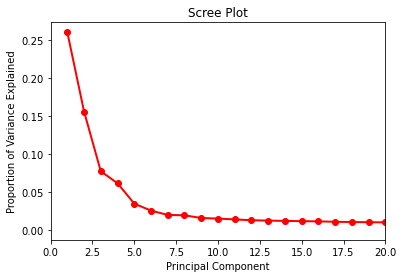

In [14]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot') 
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xlim([0, 20])
plt.show()

The above scree plot suggests that we keep 5 principal components, or potentially even 8...

In [33]:
loadings = pd.DataFrame(pca.components_.T, index=subs.columns)
vals = loadings.iloc[:,0:8].abs()
for row in vals.columns:
    print(vals[row].idxmax())

DP02_0065PE
DP02_0112PE
DP05_0018E
DP02_0093PE
DP02_0053PE
DP03_0022PE
DP03_0101PE
DP04_0003PE


In [40]:
'''
train = pca.transform(train)
test = pca.transform(test)
'''
lm = LinearRegression() # Then you directly apply those transformed frames here

https://stackoverflow.com/questions/32860849/classification-pca-and-logistic-regression-using-sklearn
